# TMA4215 Numerical Mathematics - Project 1
## Inspera-ID: 15050094356

In [18]:
# Importing libraries
import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt
import time

# To show figures in the notebook
%matplotlib inline

# The code below is just to make the plots look nice

# Make the figures more readable
newparams = {
    'figure.figsize': (18, 9), 
    'axes.grid': False,
    'lines.linewidth': 2,
    'font.size': 25,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral'
    }

# figure.figsize sets the size of the figure (values are in inches)
# axes.grid, set to False means that there is no grid
# lines.linewidth sets the thickness of the lines in the plot
# font.size sets the size of the text (ticks, title, xlabel, etc.)
# mathtext.fontset sets the font of the text of the type r'$tekst$' (math text)
# font.family sets the font of ordinary text (ticks, title, xlabel, etc.)

# There are several other parameters you can change, and you can look them up in the documentation 
# for matplotlib if you need to change any. 

plt.rcParams.update(newparams) # Updates the parameter set above. 

An undetermined linear system $A\bold{x} = \bold{y}$ is a system where there are more variables in $\bold{x}$ than there are equations ($m < n$). Such systems can have zero or infinitely many solutions. Therefore, it is often called _ill-posed_.

When faced with such linear systems, there are lots of ways going about solving them. By using clever approaches for simplifying and modifying the systems - for example utilizing different kinds of decompositions - one can drastically reduce the runtime when calculating. These methods can also have quite a varying degree of accuracy when it comes to how close their solutions are to the true solution. This is therefore also something that has to be taken into consideration when choosing a method to work with.

This project is going to be focused on different approaches for going about solving such linear systems. Task 1 and 2 will be centered around deriving and studying two different solution-methods. The first one will utilize a QR-decomplosition, while the second will use a SVD-decomplosition. In Task 3 there will be derived two ways of performing a Single Channel Source Separation, once again centered around solving a linear systems.


## **Task 1**

### **1.a)**
Before attempting to solve linear systems, one should be aware that every system can have zero or an infinite number of solutions. There will now be given examples of two different linear systems of the form $A\bold{x} = \bold{y}$, one with no solutions and one with infinitely many solutions. 

#### **No solutions:**

A relatively simple example is to let there be a row in the $A$-matrix that consits entirely of zeros, and let the corresponding row in the $y$-vector be non-zero.

Let 
$$
    A = 
    \begin{pmatrix}
1 & 1 & 1 \\
0 & 0 & 0 
\end{pmatrix}
$$
and
$$
    y = 
    \begin{pmatrix}
0 \\
1 
\end{pmatrix}
$$

The system $A\bold{x}=\bold{y}$ can be written as
$$
\begin{align*}
a_{11}x_{1} + a_{12}x_{2} + a_{13}x_{3} &= 0 = y_{1} \\
a_{21}x_{1} + a_{22}x_{2} + a_{23}x_{3} &= 0 \neq 1 = y_{2}
\end{align*}
$$ 
Since $0$ obiously does not equal $1$, the equality on last line does not hold for any combination of $x_{1}$, $x_{2}$ and $x_{3}$. Therefore this system does not have any solutions.


#### **Infinitely many solutions:**

To get a system with infinitely many solutions, one can for example let there be two equal rows in the $A$-matrix (equal meaning the same values in the respective columns), and let the corresponding rows in the $\bold{y}$-vector also be the same.
$$
    A = 
    \begin{pmatrix}
1 & 2 & 3 \\
1 & 2 & 3 
\end{pmatrix}
$$
and
$$
    y = 
    \begin{pmatrix}
1 \\
1 
\end{pmatrix}
$$

This gives the system $A\bold{x}=\bold{y}$, which can be written and simplified
$$
\left[
\begin{array}{ccc|c}
1 & 2 & 3 & 1 \\
1 & 2 & 3 & 1 \\
\end{array}
\right]
\sim
\left[
\begin{array}{ccc|c}
1 & 2 & 3 & 1 \\
0 & 0 & 0 & 0 \\
\end{array}
\right]
$$

Since the entire bottom row consists of zeros, the system has at least one free variable. A free vaariable means that one has a certain defree of freedom when solving the system, thus resulting in infinitely many solutions.


### **1.b)**

Working with a square matrix can in a lot of cases be simpler than using a rectangular one. Let $A \in \mathbb{R}^{m\times n}$ where $m < n$. It is possible to use $A$ to create two different square matrices. The first will be $A^{T}A$ with dimention $n$, and the other will be $AA^{T}$ with dimention $m$.

Want to show that $A^{T}A$ and $AA^{T}$ are symmetric positive semi-definite matrices.

#### **Symmetric:**

A matrix $M$ is _symmetric_ if $M^{T} = M$.

To show that the two matrices are symmetric, one can use the identities $(A^{T})^{T} = A$ and $(AB)^{T} = B^{T}A^{T}$.
$$
\begin{align*}
(A^{T}A)^{T} &= A^{T}(A^{T})^{T} = A^{T}A \\
(AA^{T})^{T} &= (A^{T})^{T}A^{T} = AA^{T}
\end{align*}
$$

Can therefore see that the condition for beeing symmetric holds for $A^{T}A$ and $AA^{T}$.

#### **Positive semi-definite:**

A square matrix $A \in \mathbb{R}^{n\times n}$ is _positive semi-definite_ if $\bold{x}^{T}A\bold{x} \geq 0$ for all $\bold{x} \in \mathbb{R}^{n}$.

To show that $A^{T}A$ and $AA^{T}$ are positive semi-definite, the fact that $\bold{x}^{T}\bold{x} = ||\bold{x}||^{2}$ can be used. In addition, can also use that norms are always greater or equal to zero, and that the norm of a vector $\bold{x}$ is equal to zero if and only if $\bold{x} = \bold{0}$.

Utilize this for $A^{T}A$ and $AA^{T}$:
$$
\begin{align*}
\bold{x}^{T}A^{T}A\bold{x} &= (Ax)^{T}Ax = ||Ax||^{2} \geq 0 \\
\bold{x}^{T}AA^{T}\bold{x} &= (A^{T}x)^{T}A^{T}x = ||A^{T}x||^{2} \geq 0
\end{align*}
$$

Can therefore see that the condition for beeing positive semi-definite holds for $A^{T}A$ and $AA^{T}$.

#### **Invertibility:**

Want to examine the invertibility of $AA^{T}$ and $A^{T}A$ if $A$ has full rank ($rank(A) = m$). Know that $AA^{T}$ is an $m \times m$-matrix, while $A^{T}A$ is an $n \times n$-matrix. 
___
First want to prove that $rank(A) = rank(AA^{T}) = rank(A^{T}A)$. 

Let $\bold{x}$ lie in the null space of $A$. This means that
$$
\begin{align*}
A\bold{x} &= \bold{0} \\
\Rightarrow A^{T}A\bold{x} &= \bold{0} \\
\Rightarrow \bold{x} &\in null(A^{T}A)
\end{align*}
$$
Hence $null(A)\subseteq null(A^{T}A)$.

Now, let $\bold{x}$ lie in the null space of $A^{T}A$, which gives that

$$
\begin{align*}
A^{T}A\bold{x} &= \bold{0} \\
\Rightarrow \bold{x}^{T}A^{T}A\bold{x} &= \bold{0} \\
\Rightarrow (A\bold{x})^{T}(A\bold{x}) &= \bold{0} \\
\Rightarrow A\bold{x} &= \bold{0} \\
\Rightarrow \bold{x} &\in null(A)
\end{align*}
$$

Hence $null(A^{T}A)\subseteq null(A)$.

Notice that it is proven that $null(A)\subseteq null(A^{T}A)$ and $null(A^{T}A)\subseteq null(A)$, which must mean that 

$$
\begin{align*}
null(A^{T}A) &= null(A) \\
\Rightarrow dim(null(A^{T}A)) &= dim(null(A)) \\
\Rightarrow rank(A^{T}A) &= rank(A) \\
\end{align*}
$$

Almost the exact same steps can be used to also show that $rank(A) = rank(AA^{T})$, and will therefore not be explictly done here. This means that it is proven that
$$
rank(A) = rank(AA^{T}) = rank(A^{T}A)
$$
___
Since $rank(A) = m$, this also means that $rank(AA^{T}) = rank(A^{T}A) = m$. Because $AA^{T}$ also is an $m \times m$-matrix, this must mean that it has full rank. Therefore $AA^{T}$ **is** invertible. On the other hand, since $A^{T}A$ is an $n \times n$-matrix and $n > m$, it does not have full rank. This means that $A^{T}A$ is **not** invertible.

### **1.c)**
We now want to start attemting to solve the system $A\bold{x} = \bold{y}$. Since such a system can have infinitely many solutions, we want to constrain ourselves by trying to find the solution with the minimal norm. Can define such a solution as 
$$
x_{min} = arg min_{x \in \mathbb{R}} \bold{x}^{T} \bold{x} 
$$

Want to prove that a solution to $x_{min} = arg min_{x \in \mathbb{R}} \bold{x}^{T} \bold{x}$ is given by $\bold{x}_{min} = A^{T}(AA^{T})^{-1}\bold{y}$.

Have the _Lagrange function_ 
$$
\begin{align*}
\mathcal{L}(\bold{x}, \bold{\lambda}) &= \bold{x}^{T}\bold{x} + \bold{\lambda}^{T}(A\bold{x} - \bold{y})
\\ &= \left(x_{i}x_{i} + \lambda_{i} (A_{ij}x_{j} - y_{i})\right)_{i}, n \leq i \leq 1
\end{align*}
$$

Want to minimize $\mathcal{L}$ with respect to $\bold{x}$ and simultaniously maximize $\mathcal{L}$ with respect to $\lambda$, which will require $A\bold{x} - \bold{y}$ to become the zero vector. Such a saddle point can be found by computing the gradients of $\mathcal{L}$, and setting them equal to zero.

$$
\begin{align*}
\left[\nabla_{x}\mathcal{L}(\bold{x}, \bold{\lambda})\right]_{k} &= 
\frac{\partial}{\partial x_{k}}x_{i}^{2} + \frac{\partial}{\partial x_{k}}\lambda_{i}(A_{ij}x_{j} - y_{i})
\\ &= 2x_{k} + \lambda_{k}A_{ik}
\\\\
\left[\nabla_{\lambda}\mathcal{L}(\bold{x}, \bold{\lambda})\right]_{k} &= 
\frac{\partial}{\partial \lambda_{k}}x_{i}^{2} + \frac{\partial}{\partial \lambda_{k}}\lambda_{i}(A_{ij}x_{j} - y_{i})
\\ &= A_{kj}x_{j} - y_{k}
\end{align*}
$$
Which gives
$$
\begin{align*}
\nabla_{x}\mathcal{L}(\bold{x}, \bold{\lambda}) &= 2\bold{x} + \bold{\lambda}A^{T} = 0
\\ \Rightarrow 2\bold{x} &= -\bold{\lambda}A^{T}
\\
\Rightarrow A(\nabla_{x}\mathcal{L}(\bold{x}, \bold{\lambda}))
&= A(2\bold{x} + \bold{\lambda}A^{T}) 
\\ &= 2A\bold{x} + \bold{\lambda}AA^{T} = 0
\\\\
\nabla_{\lambda}\mathcal{L}(\bold{x}, \bold{\lambda}) &= A\bold{x} - \bold{y} = 0
\\ \Rightarrow A\bold{x} &= \bold{y}
\end{align*}
$$
Can combine the two equations to find $\lambda_{min}$
$$
\begin{align*}
2A\bold{x} + \bold{\lambda}AA^{T} &= 2\bold{y} + \bold{\lambda}AA^{T} = 0
\\ \Rightarrow \lambda_{min} = -2(AA^{T})^{-1}\bold{y}
\end{align*}
$$
Which results in the formula for $\bold{x}_{min}$
$$
\begin{align*}
2\bold{x}_{min} &= -A^{T}\lambda_{min} = 2A^{T} (AA^{T})^{-1} \bold{y}
\\&\Updownarrow \\
\bold{x}_{min} &= A^{T} (AA^{T})^{-1} \bold{y}
\end{align*}
$$

### **1.d)**

Now that is is proved that $\bold{x}_{min}$ can be written as $\bold{x}_{min} = A^{T}(AA^{T})^{-1}\bold{y}$, we want to use a QR-decomposition to solve this equality. 

Are therefore going to show that the equality can be expressed as $\bold{x}_{min} = QR^{-T}\bold{y}$ where $A^{T} = QR$ is the QR decomposition. Here, $Q\in \mathbb{R}^{n\times n}$ is orthogonal and $R\in \mathbb{R}^{n\times m}$ is upper triangular. Will use the properties $(AB)^{T} = B^{T}A^{T}$, $(AB)^{-1} = B^{-1}A^{-1}$, and that $QQ^{T}=Q^{T}Q=I$ for and orthogonal matrix $Q$.
$$
\begin{align*}
\bold{x}_{min} &= A^{T}(AA^{T})^{-1}\bold{y} 
\\ &= QR((QR)^{T}QR)^{-1}\bold{y} 
\\ &= QR(R^{T}Q^{T}QR)^{-1}\bold{y} 
\\ &= Q(R^{-1})^{-1}(R^{T}R)^{-1}\bold{y} 
\\ &= Q(R^{T}RR^{-1})^{-1}\bold{y} 
\\ &= Q(R^{T})^{-1}\bold{y} 
\\ &= QR^{-T}\bold{y} 
\end{align*}
$$

Now that the groundwork is laid, it is possible to start defining functions to solve the system numerically. First, there is need for a way to calculate the $QR$ decomposition of $A^{T}$. The following code uses the Modified Gram-Schmidt-method to calculate the decomposition of a matrix $A$.

In [19]:
def modified_gram_schmidt(A):    
    '''
    Calculate the Modified Gram Schmidt

    Input: 
        A: array
    Output:
        Q: array, orthogonal
        R: array, upper triangular
    '''
    n = A.shape[1]
    Q = np.array(A, dtype='float64')
    R = np.zeros((n, n))

    # Filling Q and R with calculated values 
    for k in range(n):
        a_k = Q[..., k]
        R[k,k] = np.linalg.norm(a_k)
        a_k /= R[k, k]
        for i in range(k+1, n):
            a_i = Q[..., i]
            R[k,i] = np.matmul(np.transpose(a_k), a_i)
            a_i -= R[k, i] * a_k
    return Q, R

Can try the _modified_gram_schmidt_-function on a small test-example to make sure that it works.

In [20]:
A = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8]
])

print(f'A = ')
print(f'{A}')

Q, R = modified_gram_schmidt(A)

print(f'Q = ')
print(f'{Q}')

print(f'R =')
print(f'{R}')

print(f'QR =')
print(f'{np.matmul(Q, R)}')

A = 
[[1 2 3 4]
 [5 6 7 8]]
Q = 
[[ 0.19611614  0.98058068  0.12403473  0.99227788]
 [ 0.98058068 -0.19611614  0.99227788 -0.12403473]]
R =
[[5.09901951e+00 6.27571632e+00 7.45241314e+00 8.62910995e+00]
 [0.00000000e+00 7.84464541e-01 1.56892908e+00 2.35339362e+00]
 [0.00000000e+00 0.00000000e+00 1.79018084e-15 3.52527919e-15]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.88531091e-18]]
QR =
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


The function seems to work fine! It converts the elements in $A$ from integers to floats, but this is not a problem.


### **1.e)**
To avoid having to invert $R^{T}$, we can introduce a new variable $\bold{z} = R^{-T}\bold{y}$. Using this new variable, first solve the equation
$$
\bold{z} = R^{-T}\bold{y} \Leftrightarrow R^{T}\bold{z} = \bold{y}
$$
with respect to $\bold{z}$. Then, substitute this solution into the original equation
$$
\bold{x}_{min} = QR^{-T}\bold{y} = Q\bold{z} 
$$
To find $\bold{x}$, one simply has to multiply $Q$ with $\bold{z}$ (after having computed $\bold{z}$ of course). This will be a lot faster to solve than the system $\bold{x}_{min} = QR^{-1}\bold{y}$, since computing an inverse - especially for large matrices -  can take a lot of time.

The following code calculates $\bold{x}_{min}$ for the arrays $Q$ and $R$, and the vector $\bold{y}$. Notice that when solving for $\bold{z}$, the function _scipy.linalg.solve_triangular_ is used. Generally, these numpy functions are very effeicient, so it will be a sufficient and easy choice for such a task.

In [21]:
def x_min(Q, R, y):
    '''
    Caclulate x_min

    Input: 
        Q: array
        R: array
        y: array
    Output:
        x_min: array
    '''
    # Solving for z in order to avoid having to invert R.T
    z = linalg.solve_triangular(R.T, y, lower = True)

    # Returning x_min = Qz
    return np.matmul(Q, z)

### **1.f)**

It is now time to test the method numerically. To do this it will be generated a $m\times n$-matrix $A$, and $100$ different $\bold{x}$-vectors with randomly distributed values. The $\bold{x}$-vectors are generated instead of $\bold{y}$-vectors so that we later can compare the numerical solutions $\bold{x}_{min}$ to the true solution $\bold{x}_{true}$. Note that the implemented solver will only use the $A$-matrix and the $\bold{y}$-vectors, and the $\bold{x}$-vectors are only used for checking the error.

The following function generates the matrix $A$ with dimentions given as arguments. This was a part of the code that was handed out in the supplimentary notebook.

In [22]:
def generate_A(m,n):
    """
    Generates matrix A with m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

Can run a small test example to make sure that the $A$ is generated correctly.

In [23]:
m = 3
n = 5
print(f'm = {m}, n = {n}')
print(f'A = ')
print(f'{generate_A(m, n)}')

m = 3, n = 5
A = 
[[-0.91002841  1.61589341  1.3612232  -1.243731   -1.45293361]
 [-0.27890582 -1.15271204 -0.08631585 -1.54763836 -0.56541481]
 [-0.14512125  0.31741632 -0.11874619 -1.46303943 -0.52662566]]


The following code uses the previously defined function to generate $A$ and the $\bold{x}$-vector. To calculate the $\bold{y}$-vector that will be used in the solver, the equality $\bold{y} = A\bold{x}$ is used. 

In [63]:
N = 100 # Number of test data we want to generate

# Dimentions of the A-matrix
m = 2048 
n = 8096 

# Generate the A-matrix
A = generate_A(m,n)

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Calculate the left hand sides Y
Y = np.dot(A,X)

Will now use two different approaces to calculate $\bold{x}_{min}$. The first implementation uses the Numpy-library, while the second uses the QR-method that we developed.

When measuring the runtime of the two implementations. It will first be measured how long each method takes to precalculate the necessary matrices/decompositions, and then independently of this how much time it takes to calculate $\bold{x}_{min}$.

**Implementation 1**

This approach uses the _np.linalg.solve_-function to solve the function $AA^{T}\bold{z} = \bold{y}$ which regards to $\bold{z}$. Then, it is possible to compute $\bold{x}_{min} = A^{T}\bold{z}$ by using the calculated vector $\bold{z}$.

In [25]:
starttime = time.time()

# Calculating AAT. So this does not have to be done every time in the loop.
AAT = np.dot(A, A.T)

time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 0.388 seconds


In [26]:
starttime = time.time()

# Using the np.linalg.solve-function to calculate x_min for every y-vector
for i in range(N):
    z = np.linalg.solve(AAT,Y[:,i])
    x_sol = np.dot(A.T,z)
    
time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 16.498 seconds


The first way of solving the linear system uses between $10$ and $17$ seconds (varying from test to test). In general, the _np.linalg_-functions tends to be quite efficient. 

Yet, using this mehod for a much larger system can end up taking a lot of time, since the _np.linalg.solve_-function has to be run once for every $\bold{y}$-vector. Can see from the runtime that the precalculations are very fast, while it is solving the linear equation that takes the most substantial amount of time.

**Implementation 2**

The next implementation will use the QR-method that was derived and implemented earlier. First use the _modified_gram_schmidt_-function to perform the QR-decomposition, and then solve the $\bold{x}_{min}$ for every $\bold{y}$.

In [27]:
starttime = time.time()

# Using the modified_gram_schmidt-function to perform a QR-decomposition
Q, R = modified_gram_schmidt(A.T)

time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 24.935 seconds


In [28]:
starttime = time.time()

# Using the QR-decomposition to calculate x_min for every y-vector
for i in range(N):
    x_sol = x_min(Q, R, Y[:,i])

time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 1.59 seconds


One can see that the second implementation took longer time than the first implementation, but that this time was mostly spendt on precalculating the QR-decomposition. 

This means that if $N$ had been much bigger that $100$, this implementation might be faster than the first. This is because it is only neccecary to calulate the QR-decomposition once, while solving for the specific $\bold{y}$-vectors is very fast. If one can find a more efficient way of calculating the QR-decomposition (for example by using the Numpy-library), this way of solving the system can become quite efficient for systems with large $N$-values.

**Numerical accuracy**

Will now examine the numerical accuracy of the two methods. Since the true $x$-solutions are known, it is possible to compare be calculating the norms of the difference between the true solutions and the numerical solutions.

To measure the time more correctly earlier, the solutions were not stored in any way. Do therefore have to run the solvers again in order store the solutions.

In [64]:
# Implementation 1
solutions_1 = []
AAT = np.dot(A, A.T)
for i in range(N):
    z = np.linalg.solve(AAT,Y[:,i])
    solutions_1.append(np.dot(A.T,z))

# Implementation 2
solutions_2 = []
Q, R = modified_gram_schmidt(A.T)
for i in range(N):
    solutions_2.append(x_min(Q, R, Y[:,i]))

Can then use the numerical solutions $\bold{x}_{min}$ and the true solutions $\bold{x}_{true}$ to calculate the norms. The following code calculates and plots the norms.

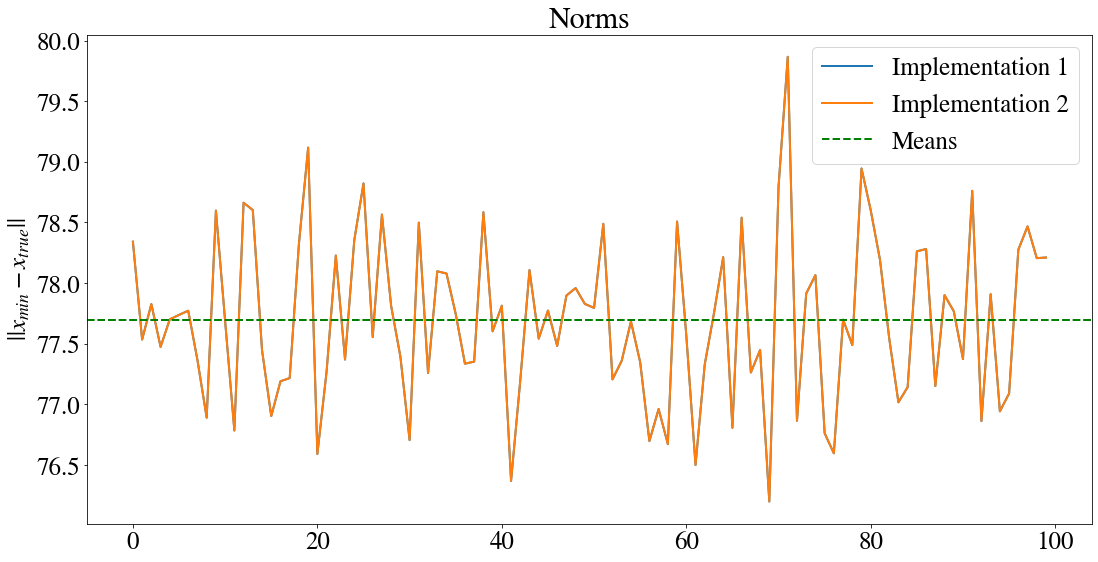

In [65]:
# Compare against true solution
norms_1 = []
norms_2 = []

# Calculating the norms for every solution of the linear system
for i in range(N):
    x_true = X[:,i]
    norms_1.append(np.linalg.norm(solutions_1[i] - x_true))
    norms_2.append(np.linalg.norm(solutions_2[i] - x_true))

# Plotting norms
plt.plot(np.arange(0, len(norms_1)), norms_1, label = "Implementation 1")
plt.plot(np.arange(0, len(norms_2)), norms_2, label = "Implementation 2")

# Also calculating and plotting the mean values
plt.axhline(np.mean(norms_1), color = 'g', linestyle = '--')
plt.axhline(np.mean(norms_2), color = 'g', linestyle = '--', label = "Means") 

plt.ylabel(r"$||x_{min} - x_{true}||$")
plt.title("Norms")
plt.legend()
plt.show()

Can see from the calculated norms and means in the plot that the accuracy of the two implementations are close to identical (because they lie on top of eachother). 

To be completely sure, we can check if there is a small difference between the implementations (or if its just due to the accuracy of the computer) by taking the difference between the two norms. The following code does this. 

In [31]:
i_vals = [5, 24, 43, 75] # Choose randomly a few norms that we are going to check
differences = []
for i in i_vals:
    differences.append(np.absolute(norms_1[i] - norms_2[i]))
print(differences) # Printing the list with the differences between the norms

[0.0, 0.0, 1.4210854715202004e-14, 1.4210854715202004e-14]


The difference between the norms of the two implementations is so low that is is most likely just due two to the precition of the computer. This means that the accuracy of the two implementations is the same. Such a result is not very suprising, since both of them find the solution of $\bold{x}$ that has the minimal norm.

Therefore, when choosing which of these two implementations to use, we just have to take into consideration the desired speed (since their precition is the same). Because of this, the _np.linalg.solve_-function seems like the best choice for solving this particular linear system, since it was the fastest of the two.

Another thing to note is that the norms are quite high, which means that $\bold{x}_{min}$ and $\bold{x}_{true}$ differs a bit from each other. The implemented method is only interested in finding the solution with the minimal norm. Yet, finding a solution closest to $\bold{x}_{true}$ is obiouisly impossible (as long as $\bold{x}_{true}$ is unknown), since the system has an infinite number of solutions.

In the next task, we are go about solving the system in a bit different way, and not only focus of which solution results in the minimal norm. 

## **Task 2**

Instead of attempting to solve the system by using the constrait that $\bold{x}$ has to be the minimal norm-solution, we can instead consider the least squares solution 
$$
arg min_{x \in \mathbb{R}^{n}} ||A\bold{x}-\bold{y}||^{2}
$$

One disadvantage with such a method is that the minimum is not unique, unlike the previous method were this was the case. In order to "combat" such a disadvantage (while still not constraining the soltuion), it is possible to introduce a weight $\mu > 0$. By using such a weight, we are able to balance between a small norm of $\bold{x}$ and a soltuion of $A\bold{x} = \bold{y}$.

This way of solving the system is called _Tikhonov regularisation_, and can be written as
$$
\bold{x}_{r} = argmin_{x \in \mathbb{R}} = ||A\bold{x} - \bold{y}||^{2} + \mu||\bold{x}||^{2}
$$
together with an SVD-decomposition of the $A$-matrix. It is also handy to introduce $T(\bold{x})=||A\bold{x} - \bold{y}||^{2} + \mu||\bold{x}||^{2}$.

### **2.a)**
A solution to the Tikhonov regularisation satisfies $\nabla_{x}T(\bold{x}_{r}) = 0$, want to show that such a solution $\bold{x}_{r}$ also satsfies $(A^{T}A + \mu I)\bold{x}_{r} = A^{T}\bold{y}$

Take the gradient with respect to $\bold{x}$:
$$
\begin{align*}
\nabla_{\bold{x}}T(\bold{x}) &= \nabla_{\bold{x}}(||A\bold{x} - \bold{y}||^{2} + \mu||\bold{x}||^{2})
\\ &= 2A^{T}(A\bold{x} - \bold{y}) + 2\mu\bold{x}
\\ &= 2A^{T}A\bold{x} - 2A^{T}\bold{y} + 2\mu\bold{x}
\end{align*}
$$

Set $\nabla_{\bold{x}}T(\bold{x})$ equal to zero:
$$
\begin{align*}
\nabla_{\bold{x}}T(\bold{x}) &= 2A^{T}A\bold{x} - 2A^{T}\bold{y} + 2\mu\bold{x} \\& = 0
\\ &\Updownarrow \\
A^{T}A\bold{x} +\mu\bold{x} &= A^{T}\bold{y}
\\ &\Updownarrow \\
(A^{T}A +\mu I)\bold{x}&= A^{T}\bold{y}
\end{align*}
$$

A solution $\bold{x}_{r}$ that satisfies $\nabla_{\bold{x}}T(\bold{x}_{r}) = 0$ will also satisfy $(A^{T}A +\mu I)\bold{x}_{r}= A^{T}\bold{y}$.

Further, we want to prove that $A^{T}A +\mu I$ is SPD. For it to be SPD it has to be symmetric ($U^{T} = U$) and positive deifinite ($\bold{x}^{T}U\bold{x} > \bold{0}$ for all $\bold{0} \neq \bold{x} \in \mathbb{R}^{n}$).

#### **Symmetric:**
$$
\begin{align*}
(A^{T}A +\mu I)^{T} &= (A^{T}A)^{T} + (\mu I)^{T}
\\ &= A^{T}(A^{T})^{T} +\mu I^{T}
\\ &= A^{T}A +\mu I
\end{align*}
$$

#### **Positive deifinite:** 

Let $\bold{x}$ be a vector that satisfies $\bold{0} \neq \bold{x} \in \mathbb{R}^{n}$.
$$
\begin{align*}
\bold{x}^{T}(A^{T}A +\mu I)\bold{x} &=\bold{x}^{T}(A^{T}A)\bold{x} + \bold{x}^{T}(\mu I)\bold{x}
\\ &= (A\bold{x})^{T}(A\bold{x}) + \mu\bold{x}^{T}\bold{x}
\\ &= ||A\bold{x}||^{2} + \mu||\bold{x}||^{2} > 0
\end{align*}
$$
The last inequality has to hold since $||A\bold{x}||^{2}$, $||\bold{x}||^{2}$ and $\mu$ are all greater than zero.

#### **Invertible:** 
Since $A^{T}A +\mu I$ in SPD, it therefore implies that it is invertible.

### **2.b)**
When finding $\bold{x}_{r}$, we want to use a SVD-decomposition $A = U\Sigma V^{T}$. Want to prove that when using $A = U\Sigma V^{T}$, $\bold{x}_r$ satisties $\bold{x}_r = VDU^{T}$. Here, $D$ is a diagonal matrix. Also want to find the values along the diagonal of this $D$ matrix.

Remember the fact that $VV^{T} = I$ and $UU^{T} = I$
$$
\begin{align*}
A^{T}A &= (V \Sigma^{T} U^{T})(U\Sigma V^{T})
\\ &= V\Sigma^{T}\Sigma V^{T}
\\ &\Downarrow \\

(A^{T}A +\mu I)\bold{x}_{r} &= A^{T}\bold{y}
\\ \Leftrightarrow 
(V\Sigma^{T}\Sigma V^{T} + V(\mu I)V^{T})\bold{x}_{r} &= A^{T}\bold{y}
\end{align*}
$$
Here, both $\Sigma^{T}\Sigma$ and $\mu I$ will be diagonal matrices. Let $D_{1} := \Sigma^{T}\Sigma$ (which will have $\sigma_{i}^{2}$ as its i-th diagonal element), and $D_{2} := \mu I$ (which will have $\mu$ all along its diagonal). 

For two diagonal matrices of the same dimention, we have $VD_{1}V^{T} + VD_{2}V^{T} = V(D_{1} + D_{2})V^{T}$. Can use this to simplify our equation by defining $D_{3} := D_{1} + D_{2}$.
$$
\begin{align*}
(V\Sigma^{T}\Sigma V^{T} + V(\mu I)V^{T})\bold{x}_{r} &= (VD_{1}V^{T} + VD_{2}V^{T})\bold{x}_{r}
\\ &= (V(D_{1} + D_{2})V^{T})\bold{x}_{r}
\\ &= (VD_{3}V^{T})\bold{x}_{r}
\\ \Downarrow \\
(VD_{3}V^{T})\bold{x}_{r} &= A^{T}\bold{y} \\ &= V\Sigma^{T} U^{T}\bold{y}
\end{align*}
$$

Have earlier proved that $A^{T}A +\mu I$ is invertible, which means that the same applies for $VD_{3}V^{T}$. Also notice that $\Sigma$ is a diagonal matix that has $\sigma_{i}$ as its i-th diagonal element. Can therefore define $D := D_{3}^{-1}\Sigma^{T}$
$$
\begin{align*}

(VD_{3}V^{T})\bold{x}_{r} &= V\Sigma^{T} U^{T}\bold{y}
\\ &\Downarrow \\
\bold{x}_{r} &= (VD_{3}V^{T})^{-1}V\Sigma^{T} U^{T}\bold{y}
\\ &= VD_{3}^{-1}V^{T}V\Sigma^{T} U^{T}\bold{y}
\\ &= VD_{3}^{-1}\Sigma^{T} U^{T}\bold{y}
\\ &= VDU^{T}\bold{y}
\end{align*}
$$

Can from here see that $\bold{x}_r$ satisfies $\bold{x}_r = VDU^{T}\bold{y}$ with $D$ being a diagonal matrix with the elements $\frac{\sigma_{i}}{\sigma_{i}^{2} + \mu}$ along its diagonal.

### **2.c)**

Can now write a function that computes $\bold{x}_{r}$ numerically using the SVD approach. The function takes in $U$, $\Sigma$ and $V^{T}$ as arguments instead of $A$. This is simply to give more flexibility to how we want to perform the SVD-decomposition.

In [32]:
def Tikhonov_solveSVD(U, S, Vt, mu):
    '''
    Solving for x_r using the SVD-approach

    Input
        U: array
        S: array (vecor, NOT a matrix)
        Vt: array
        mu: array
    Output:
        x_r: array
    '''
    # Calculate the diagonal matrix D
    d = (S)/(np.square(S) + mu)
    D = np.diag(d)
    
    # Calculating and returning x_r
    return np.matmul(Vt.T, np.matmul(D, U.T))

### **2.d)**
Like in task 1, the function will now be used to solve different numerical systems to test its efficiency and accuracy. Instead of using lots of different left hand sides $\bold{y}$, the test will insead use different values for the regularisation parameter $\mu$. We do this to test how $\mu$ affect the accuracy of the method.


In order to easily check for different $\mu$-values, the following functions generates an array of $N$ logarithmically spaced $\mu$-values between a minimum power (default $10^{-6}$) and maximum power (default $10^{6}$ starting with the highest value.

In [33]:
def generate_mu(N = 100, min_power = -6, max_power = 6):
    '''
    Generating a desired number of logarithmically spaces mu-values between 10^min_power and 10^max_power using np.logspace
    Input:
        N: int
        min_power: int
        max_power: int
    Output
        mu: array
    '''
    return np.logspace(max_power, min_power, N)

Check that the _generate_mu_-function works as intended.

In [34]:
print(f'mu = {generate_mu(N = 5)}')

mu = [1.e+06 1.e+03 1.e+00 1.e-03 1.e-06]


Use similar code as earlier to generate the $A$-matrix, and an $\bold{x}$- and $\bold{b}$-vector. Choose the first vectors in the $X$- and $Y$-matrices to be the $\bold{x}_{true}$ and $\bold{b}$-vector (since the testing will use different values for $\mu$, not different $\bold{y}$-vectors).

In [35]:
N = 100 # Number of test data we want to generate

# Dimentions of the A-matrix
m = 2048
n = 8096

# Generating the A-matrix
A = generate_A(m,n)

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))
# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Will for the testing only need one x-vector and one y-vector, there for choose to use the first ones generated.
x = X[:,0]
b = Y[:,0]

Can now solve for $\bold{x}_{r}$ using two different approaches. The first will use the SVD-method derived throughout the task, and the second will once again make use of the _np.linalg.solve_-function.

**Approach 1**

The first cell generates an array of mu-values, and times how long it takes to calculate the SVD-decomposition.

In [36]:
# Generate the mu-values
mu_approach_1 = generate_mu(N)

starttime = time.time()

# Using the np.linalg.svd-function to calculate the decomposition
U,S,Vt = np.linalg.svd(A, full_matrices = False)

time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 21.446 seconds


The second cell uses the _Tikhonov_solveSVD_-function to calculate $\bold{x}_{r}$ for the different $\mu$-values, and times how long this takes.

In [37]:
starttime = time.time()

# Use the Tikhonov_solveSVD-function to calculate x_r for all mu-values
for i in range(N):
    x_true = X[:,i]
    x_r = np.dot(Tikhonov_solveSVD(U, S, Vt, mu_approach_1[i]), b)

time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 55.742 seconds


Notice that this method of solving the numerical system was even slower than the implementation from Task 1.

**Approach 2**

The second approach will simply be to use the _np.linalg.solve_-function. Note that this way of solving the system will be very slow, and therefore a much coarser grid of $\mu$-values is being used.

In [38]:
starttime = time.time()

# Precalculating ATA and ATb
ATA = np.dot(A.T,A)
ATb = np.dot(A.T,b)

# Generate 10 different mu-values (instead of 100 as in approach 1)
mu_approach_2 = generate_mu(10)

time_diff = time.time() - starttime
print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 0.827 seconds


In [39]:
starttime = time.time()

# Use the np.linalg.solve-funciton to find x_r for all the mu_values
for mu_i in mu_approach_2:
    x_r = np.linalg.solve(ATA+mu_i*np.identity(n), ATb)

time_diff = time.time() - starttime

print(f'Total time: {round(time_diff, 3)} seconds')

Total time: 23.172 seconds


For only $10$ different values for $\mu$, this approach uses over $20$ seconds. Even though the approach uses a Numpy-function, the time-measurement reveals that it is not very efficient.

**Numerical accuracy**

Can now examine how the $\mu$-values affect the errors (in approach 1) by plotting the errors as a funciton of $\mu$. Will also use the method from task 1 to solve the system, and plot this norm as a horisontal line to check how the accuracy of the two methods compare. 

The following code computes the norms for the two approaches, and the norm from the _x_min_-function (Task 1, Approach 2)

In [40]:
# Task 2, Approach 1

# Generate the mu-values
mu_approach_1 = generate_mu(N)

starttime = time.time()

# Using the np.linalg.svd-function to calculate the decomposition
U,S,Vt = np.linalg.svd(A, full_matrices = False)

errors_approach_1 = []

# Use the Tikhonov_solveSVD-function to calculate x_r for all mu-values
for i in range(N):
    x_r = np.dot(Tikhonov_solveSVD(U, S, Vt, mu_approach_1[i]), b)
    errors_approach_1.append(np.linalg.norm(x_r - x))


# Task 2, Approach 2
# Generate the mu-values
mu_approach_2 = generate_mu(20)
errors_approach_2 = []

# Precalculating ATA and ATb
ATA = np.dot(A.T,A)
ATb = np.dot(A.T,b)

# Use the np.linalg.solve-funciton to find x_r for all the mu_values
for mu_i in mu_approach_2:
    x_r = np.linalg.solve(ATA+mu_i*np.identity(n), ATb)
    errors_approach_2.append(np.linalg.norm(x_r - x))


# Task 1, Approach 2

# Using the modified_gram_schmidt-function to perform a QR-decomposition
Q, R = modified_gram_schmidt(A.T)

# Calculate x_min
x_min_task_1 = x_min(Q, R, b)

# Calculate the norm
norm_task_1 = np.linalg.norm(x_min_task_1 - x)

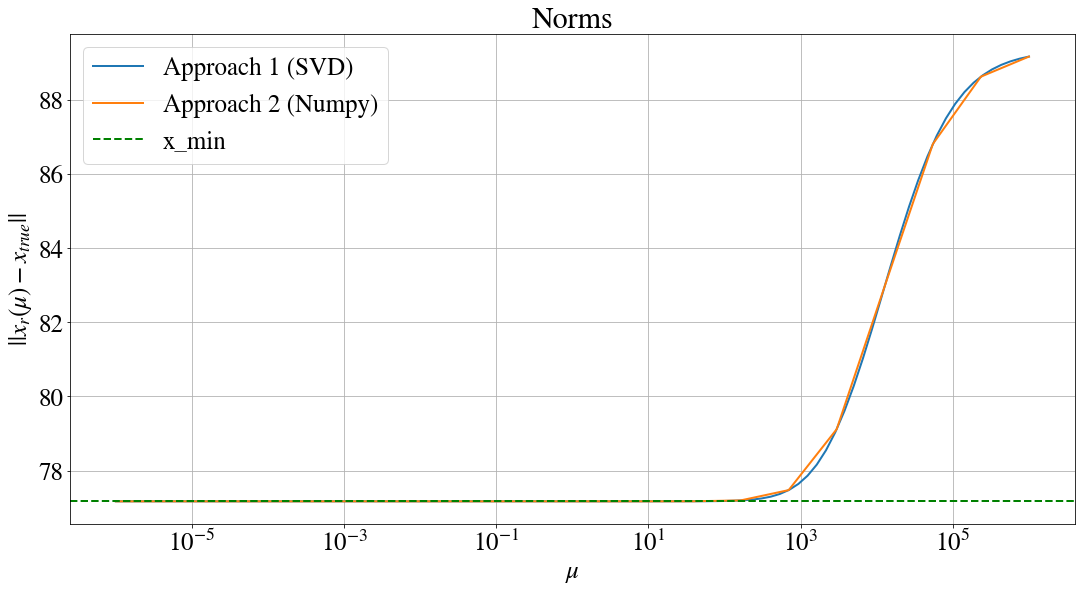

In [61]:
# Plot the errors as a funciton of mu
def plot_error():
    plt.plot(mu_approach_1, errors_approach_1, label = 'Approach 1 (SVD)')
    plt.plot(mu_approach_2, errors_approach_2, label = 'Approach 2 (Numpy)')
    plt.axhline(norm_task_1, color = 'g', linestyle = '--', label = "x_min")
    
    plt.title("Norms")
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$||x_{r}(\mu) - x_{true}||$')
    plt.xscale("log") # Scale the x-axis logarithmically
    plt.grid()
    plt.legend()
    plt.show()

plot_error()


Can see from the plot that the norm for the two approaches is lower for smaller  $\mu$-values. As $\mu$ grows, the norms stays about the same up to a bit less than $\mu \approx 10^{3}$ from where they start to increase. The norms for the two approaches and the _x_min_-method (from Task 1) are the same as long as $\mu < 10^{3}$ (after which the norms for the two approaches increases). It is worth mentioning that it looks like the accuracy of Approach 1 and Approach 2 is the same. The only reason for why Approach 2 is not as smooth (and therefore deviate a bit from Approach 1) is because the norms are calculated for a lot fewer $\mu$-values.

When considering what $\mu$ goves the best reconstruction of $\bold{x}_{true}$, this will be the values that results in the lowest norms. These will be the $\mu$-values lower than about $10^{2}$. When decreasing the value from $10^{2}$, we can see that the norm stays flat.

For which method that is the most numerically efficient, we can observe from the timed calculations that Approach 1 took $21.446+55.742=77.188$ seconds for $100$ $\mu$-values, while Approach 2 took $0.827+23.172=23.999$ seconds for $10$ $\mu$-values. That is an average of $0.77188$ seconds per $\mu$-value for Approach 1, and $2.399$ seconds per $\mu$-value for Approach 2. This means that Approach 1  is a lot more computationally efficient than Approach 2. Note that taking the average time per $\mu$-value is not entirely correct, since not all caluclations are done for every $\mu$-value (f.ex do we just perform $1$ SVD-decomposition in Approach 1). Yet, the average gives at least an idea of the differences in speed, and its obious that Approach 1 is the fastest. 

When compared to the QR-method from task 1, this had the computation-time $24.935 + 1.59 = 26.525$ for $100$ calculations. This means that this approach was definetely the fastest of the three. If we also include the _np.linalg.solve_-apporach from Task 1, this was the fastest out of the four approaches we have tested thus far.

## **Task 3**

Single Channel Source Separation is, as the name suggest, seperating a single source into two channels $\bold{u}$ and $\bold{v}$. This can for example be useful for seperating the voice from background noise in a audio recording or seperating different parts of an image. This task will focus of developing a method for performing a Single Channel Source Separation on images from the MNIST dataset.

We will assume that the vectors $W_{0}$ and $W_{1}$ are given, and that $B$ is the matrix 
$$
B = 
\begin{bmatrix}
B_{0} & 0 \\
0 & B_{1} 
\end{bmatrix}
= I - WW^{T}
$$ 
where $B_{0} = I - W_{0}W_{0}^{T}$, $B_{1} = I - W_{1}W_{1}^{T}$, and $W$ is a matrix with pairwise othogonal columns. It is work noting that $W_{0}$ and $W_{1}$ consists of $16$ different basis vectors, that will form an orthonormal basis for the space where the different images (hopefully) lie.

Task 3b and 3c will develop two different ways of separating an image into two sources $\bold{u}$ and $\bold{v}$. Task 3b will use a minimal norm-approach, while  Task 3c will use Tikhonov regularisation.

### **3.a)**

First, we want to prove a few important properties of $B$.

#### **Projection matrix:**

A matrix $B$ is a projection matrix if $B^{2} = B$. To show that our $B = I - WW^{T}$ is a projection matrix, the property $(X + Y)^{2} = X^{2} + XY + YX + Y^{2}$ can be used. Since the matrix has pairwise orthogonal columns, it will also be used that $WW^{T}\neq I$ while $W^{T}W = I$
$$
\begin{align*}
B^{2} &= (I - WW^{T})(I - WW^{T})
\\ &= I^{2} - I(WW^{T}) - (WW^{T})I + (WW^{T})(WW^{T})
\\ &= I - 2(WW^{T}) + (WW^{T})
\\ &= I - WW^{T}
\\ &= B
\end{align*}
$$

#### **Symmetric:**

$B$ is symmetric if $B = B^{T}$.
$$
\begin{align*}
B^{T} &= (I - WW^{T})^{T}
\\ &= I^{T} - (WW^{T})^{T}
\\ &= I - (W^{T})^{T}W^{T}
\\ &= I - WW^{T}
\\ &= B
\end{align*}
$$

#### **Positive semi-definite:**

B is positive semi-definite if $\bold{x}^{T}B\bold{x} \geq 0$ for all $\bold{x} \in \mathbb{R}^{n}$ (except for $\bold{x} = \bold{0}$).

$$
\begin{align*}
\bold{x}^{T}B\bold{x} &= \bold{x}^{T}(BB)\bold{x}
\\ &= \bold{x}^{T}B^{T}B\bold{x}
\\ &= (B\bold{x})^{T}(B\bold{x})
\\ &= ||B\bold{x}||^{2} \geq 0
\end{align*}
$$
The last inequality holds since the norm cannot be negative.

### **3.b)**
#### Minimal norm

Similar to in Task 1, we want to find a solution $\bold{x} = \begin{pmatrix} \bold{u} \\ \bold{v} \end{pmatrix}$ that gives the minimal norm. This minimal norm formulation can be formulated as
$$
argmin_{x} \frac{1}{2}\bold{x}^{T}B\bold{x}
$$
such that $A\bold{x}=\bold{y}$.

The idea is to solve the system $A\bold{x} = \bold{u} + \bold{v} = \bold{y}$ while making sure that $\bold{u}$ is small in some norm and $\bold{v}$ is small in some other norm.

#### **1)**

The corresponding Lagrangian function to the minimal norm formulation is $\mathcal{L}(\bold{x}, \bold{\lambda}) = \frac{1}{2}\bold{x}^{T}B\bold{x} + \bold{\lambda}^{T}(A\bold{x} - \bold{y})$. Can then solve the equations $\nabla_{\bold{x}}\mathcal{L} = 0$ and $\nabla_{\bold{\lambda}}\mathcal{L} = 0$.
$$
\begin{align*}
\nabla_{\bold{x}}\mathcal{L} &= \nabla_{\bold{x}}\left(\frac{1}{2}\bold{x}^{T}B\bold{x} + \bold{\lambda}^{T}(A\bold{x} - \bold{y})\right)
\\ &= \left(\frac{1}{2}B^{T} + \frac{1}{2}B\right)\bold{x} + A^{T}\bold{\lambda}
\\ &= 0
\\
\nabla_{\bold{\lambda}}\mathcal{L} &= \nabla_{\bold{\lambda}}\left(\frac{1}{2}\bold{x}^{T}B\bold{x} + \bold{\lambda}^{T}(A\bold{x} - \bold{y})\right)
\\ &= A\bold{x} - \bold{y}
\\ &= 0
\\ \Leftrightarrow A\bold{x} &= \bold{y}
\end{align*}
$$

These two equations can be written as the system
$$
\begin{bmatrix}
\frac{1}{2}B^{T} + \frac{1}{2}B & A^{T} \\
A & 0 
\end{bmatrix}
\begin{bmatrix}
\bold{x} \\
\bold{\lambda}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
\bold{y} 
\end{bmatrix}
$$

By using that 
$$
\bold{x} 
=
\begin{pmatrix}
\bold{u}  \\
\bold{v} 
\end{pmatrix} 
$$
$$ 
\bold{A} 
=
\begin{pmatrix}
I  \\
I
\end{pmatrix} 
$$

and that 
$$
B
=
\begin{pmatrix}
B_{0} & 0  \\
0 & B_{1}
\end{pmatrix} 
$$
one can write the system in terms of $\bold{u}$, $\bold{v}$ and $\bold{\lambda}$. Notice that $B$ is a diagonal matrix, which means that $B^{T} = B$. Can start by looking at the equations.
$$
\begin{align*}
\left(\frac{1}{2}B^{T} + \frac{1}{2}B\right)\bold{x} + A^{T}\bold{\lambda} &= B\bold{x} + A^{T}\bold{\lambda}
\\ &= 
\begin{pmatrix}
B_{0} & 0  \\
0 & B_{1}
\end{pmatrix} 
\begin{pmatrix}
\bold{u}  \\
\bold{v} 
\end{pmatrix}  + 
\begin{pmatrix}
I & I 
\end{pmatrix} \lambda
\\ &= 
\begin{pmatrix}
I - W_{0}W_{0}^{T} & 0  \\
0 & I - W_{1}W_{1}^{T}
\end{pmatrix} 
\begin{pmatrix}
\bold{u}  \\
\bold{v} 
\end{pmatrix}  + 
\begin{pmatrix}
I & I 
\end{pmatrix} \lambda
\\&= 0
\end{align*}
$$
and
$$
\begin{align*}
\bold{y}&= A\bold{x} = \begin{pmatrix}
I  \\
I
\end{pmatrix} 
\begin{pmatrix}
\bold{u}  \\
\bold{v} 
\end{pmatrix} = I\bold{u} + I\bold{v}
\end{align*}
$$

This gives us a system consisting of three equations. Can write this in matrix form.

$$
\begin{bmatrix}
I - W_{0}W_{0}^{T} & 0 & I \\
0 & I - W_{1}W_{1}^{T} & I \\
I & I & 0
\end{bmatrix}
\begin{bmatrix}
\bold{u} \\
\bold{v} \\
\bold{\lambda}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
\bold{y} 
\end{bmatrix}
$$

#### **2)**

Can eliminate $\bold{\lambda}$ by using the two equations
$$
\begin{align*}
(I - W_{0}W_{0}^{T})\bold{u} + \bold{\lambda} = B_{0}\bold{u} + \bold{\lambda} = 0 \\
(I - W_{1}W_{1}^{T})\bold{v} + \bold{\lambda} = B_{1}\bold{v} + \bold{\lambda} = 0
\end{align*}
$$
The last of the two implies that $\bold{\lambda} = -B_{1}\bold{v}$. Can substitute this into the first equation.
$$
B_{0}\bold{u} + \bold{\lambda} = B_{0}\bold{u} -B_{1}\bold{v} = 0
$$

This gives us the system
$$
\begin{bmatrix}
B_{0} & -B_{1} \\
I & I 
\end{bmatrix}
\begin{bmatrix}
\bold{u} \\
\bold{v} \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
\bold{y} 
\end{bmatrix}
$$

Using the fact that $\bold{u} + \bold{v} = \bold{y} \Leftrightarrow \bold{v} = \bold{y} - \bold{u}$, we can do another substitution to the first equality in the system.
$$
\begin{align*}
B_{0}\bold{u} - B_{1}\bold{v} &= B_{0}\bold{u} - B_{1}(\bold{y} - \bold{u})
\\ &= (B_{0} + B_{1})\bold{u} - B_{1}\bold{y} \\&= 0
\\ \Rightarrow (B_{0} + B_{1})\bold{u} &= B_{1}\bold{y}
\\ \Rightarrow C\bold{u} &= \bold{d}
\end{align*}
$$
where $C = B_{0} + B_{1} = 2I - W_{0}W_{0}^{T} - W_{1}W_{1}^{T}$ and $\bold{d} = B_{1}\bold{y} = (I - W_{1}W_{1}^{T})\bold{y}$.

After solving this system for $\bold{u}$, one can easily find $\bold{v} = \bold{y} - \bold{u}$.

#### **3)**

Can now implement a method for calculating $\bold{u}$ and $\bold{v}$ using the minimal norm approach. To find $\bold{u}$, one have to solve the linear system $C\bold{u} = \bold{d}$, and there are multiple ways to do this numerically. 

In the following code, it is chosen to use the _np.linalg.solve_-function to solve the system. This is because it is relatively easy to implement, and often very quick. Of course, there are other methods that in some instances could be faster, but the chosen way seemed like a reliable and simple approach.

In [42]:
def calculate_minimal_norm(W0, W1, y):
    '''
    Seperating the channels by calculating the minimal norm
    
    Input:
        W0: array
        W1: array
        y: array
    Output:
        u: array
        v: array
    '''
    # Calculating BO and B1
    B0 = np.identity(len(W0)) - np.matmul(W0, W0.T)
    B1 = np.identity(len(W1)) - np.matmul(W1, W1.T)
    
    # The matrix and the vector in the linear system Cu = d
    C = B0 + B1
    d = np.matmul(B1, y)

    # Solving the linear system
    u = np.linalg.solve(C, d)

    # Equating v
    v = y - u

    return u, v    

This will be discussed more later when we plot the separated and reconstructed images, but this approach has a few advantages and disadvantages. One advantage is that it is not weighted, which means that we do not have to bother with a parameter $\mu$ when separating. Another advantage is that the solutions $\bold{u}$ and $\bold{v}$ are unique (much like the solutions in Task 1).

One disadvantage is that the method only calculates $\bold{u}$ and $\bold{v}$ based on which solution that gives the $\bold{x}$ with the lowest norm. This can mean that the separated images ends up not conveying what they were supposed to separate all that well, something that will be further inspected later.

### **3.c)**

#### Tikhonov regularisation

As in Task 2, we will now not focus on the minimal norm, but instead on the least square solution. Remember from earlier that this does not yield a unique solution, so we introduse the regularisation parameter $\mu$. The Tikhonov regularisation therefore reads
$$
argmin_{x} ||A\bold{x} - \bold{y}||^{2} + \mu ||B\bold{x}||^{2}
$$

Like for the minimal norm approach, we want to solve the system $A\bold{x} = \bold{y}$ while making sure that $\bold{u}$ is small in some norm and $\bold{v}$ is small in some other norm.

#### 1)
Can use the exact same approach as in task 2.a to get the equation $(A^{T}A +\mu I)\bold{x}= A^{T}\bold{y}$. Since $B$ is symmetric we have that $B^{T}B = I$. This gives the equation
$$
(A^{T}A +\mu B^{T}B)\bold{x} = A^{T}\bold{y}
$$

Similar to earlier we can substitue $A$, $B$ and $x$
$$
\begin{align*}
(A^{T}A +\mu B^{T}B)\bold{x} &= A^{T}\bold{y}
\\  
\left(\begin{pmatrix}
I  & I\\
I & I
\end{pmatrix} +\mu \begin{pmatrix}
I - W_{0}W_{0}^{T} & 0  \\
0 & I - W_{1}W_{1}^{T}
\end{pmatrix} \right)\begin{pmatrix}
\bold{u}  \\
\bold{v} 
\end{pmatrix} &= \begin{pmatrix}
I  \\
I 
\end{pmatrix}\bold{y}
\end{align*}
$$

This gives us the two equations
$$
\begin{align*}
(I + \mu(I - W_{0}W_{0}^{T}))\bold{u}  + I\bold{v} &= \bold{y}
\\
I\bold{u}  + (I + \mu(I - W_{1}W_{1}^{T}))\bold{v} &= \bold{y}   
\end{align*}
$$

Which can be written as the system

$$
\begin{bmatrix}
I + \mu(I - W_{0}W_{0}^{T}) & I \\
I & I + \mu(I - W_{1}W_{1}^{T}) \\
\end{bmatrix}
\begin{bmatrix}
\bold{u} \\
\bold{v} \\

\end{bmatrix}
=
\begin{bmatrix}
\bold{y} \\
\bold{y} 
\end{bmatrix}
$$

#### 2)

Setting the two equations equal to each other (since both equal $\bold{y}$)
$$
\begin{align*}
\bold{u} + \mu B_{0}\bold{u} + \bold{v} &= \bold{u} + \bold{v} + \mu B_{1}\bold{v}
\\ &\Updownarrow \\
B_{0}\bold{u} &= B_{1}\bold{v}
\end{align*}
$$

This means that $\bold{u} = B_{0}^{-1}B_{1}\bold{v}$ and $\bold{v} = B_{1}^{-1}B_{0}\bold{u}$. Can substitute this back into the original equations
$$
\begin{align*}
\bold{u} + \mu B_{0}\bold{u} + \bold{v} &= \bold{u} + \mu B_{0}\bold{u} + B_{1}^{-1}B_{0}\bold{u}
\\ &= (I + \mu B_{0} + B_{1}^{-1}B_{0})\bold{u}
\\ &=\bold{y}
\\ \Rightarrow (B_{1} + \mu B_{1}B_{0} + B_{0})\bold{u} &= B_{1}\bold{y}
\\
\bold{u} + \bold{v} + \mu B_{1}\bold{v} &= B_{0}^{-1}B_{1}\bold{v} + \bold{v} + \mu B_{1}\bold{v}
\\ &= (I + \mu B_{1} + B_{0}^{-1}B_{1})\bold{v}
\\ &=\bold{y}
\\ \Rightarrow (B_{0} + \mu B_{0}B_{1} + B_{1})\bold{v} &= B_{0}\bold{y}

\end{align*}
$$

Define $C_{0} = B_{1} + \mu B_{1}B_{0} + B_{0}$, $C_{1} = B_{0} + \mu B_{0}B_{1} + B_{1}$, $d_{0} = B_{1}\bold{y}$ and $d_{1} = B_{0}\bold{y}$. To find $\bold{u}$ and $\bold{v}$, one simply have to solve the systems $C_{0}\bold{u} = d_{0}$ and $C_{1}\bold{v} = d_{1}$.

#### **3)**

Can now impliment a method for calculating $\bold{u}$ and $\bold{v}$ using the Tikhonov regularisation approach. Like for the minimal norm approach, _np.linalg.solve_ is used to solve the linear system.

In [43]:
def calculate_tikhonov_regulation(W0, W1, y, mu):
    '''
    Seperating the channels by use of Tikhonov Regulation
    Input:
        W0: array
        W1: array
        y: array
        mu: float
    Output:
        u: array
        v: array
    '''
    # Calculating BO and B1
    B0 = np.identity(len(W0)) - np.matmul(W0, W0.T)
    B1 = np.identity(len(W1)) - np.matmul(W1, W1.T)
    
    # The matrices and the vectors for the linear systems C_0u = d_0 and C_1v = d_1
    C0 = B1 + mu * np.matmul(B1, B0) + B0
    C1 = B0 + mu * np.matmul(B0, B1) + B1
    d0 = np.matmul(B1, y)
    d1 = np.matmul(B0, y)

    # Solving the linear systems, and returning the vectors u and v
    return np.linalg.solve(C0, d0), np.linalg.solve(C1, d1) 

Like the minimal norm approach, this method does also have its advantages and disadvantages. Notice that if $\mu = 0$, the approach will be exactly the same as the minimal norm-approach. This means that this method is very similar to the minimal norm-approach, except that is more a bit more flexible. One major disadvantage is that it is neccecary to solve two linear systems instead of just one, so the method will probably be slower.

### **3.d)**

In order to test the approaches, $100$ different test examples are going to be used. Then, the time that it taks to separate all of the $100$ images is going to be measured.

The following code is copied from the supplimentary notebook, and loads the test data into the project.

In [44]:
Mixes = np.load('Data/mixed.npy')
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')

# Nice practice to check that the data was imported correctly by printing the shapes
print(Mixes.shape) # Should be (784,100)
print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)

(784, 100)
(784, 16)
(784, 16)


Run the function that seperates all of the $100$ images using the minimal norm approach, and calculate the mean runtime.

In [45]:
%%timeit -r 5
# Iterating through all the mixes, and calculating u and v for every one
for i in range(Mixes.shape[1]):
    # Seperating the sources
    u, v = calculate_minimal_norm(W0, W1, Mixes[:,i])

2.46 s ± 424 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Can observe from the timed separation above that it is very quick to separate all $100$ images. In this test it took on average a bit over 2 seconds.

Run the function that seperates all of the $100$ images, this time using the Tikhonov regularisation approach, and calculate the mean runtime.

In [46]:
mu = generate_mu(2)[0] # Generate a single mu value (not equal to zero)

In [47]:
%%timeit -r 5
# Iterating through all the mixes, and calculating u and v for every one
for i in range(Mixes.shape[1]):
    # Seperating the sources
    u, v = calculate_tikhonov_regulation(W0, W1, Mixes[:,i], mu)

7.32 s ± 675 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


It took the Tikhonov regularisation approach $7.32 - 2.46 = 4.86$  seconds longer to separate all $100$ images. This has to do with the fact that there are two linear systems that has to be solved instead of just one.


#### Checking the separated images
It also is always a good practice to check the seperations to make sure that the separations and reconstruction look the way they should.

The following function takes in the vetors $\bold{u}$ and $\bold{v}$ as arguments, and plots the two seperated images, the reconstuction of the image, and and the original image (before seperation).

In [48]:
def plot_u_v(u, v, original, n, mu = -1):
    '''
    Plot the seperated sources, the reconstruction, and the original (before seperation)
    Input:
        u: array
        v: array
        original: array
        n: int
        mu: float
    '''

    # Print the mu-value if it is given as an argument
    if mu != -1: 
        print(f'mu = {round(mu, 6)}')
        
    fig, axarr = plt.subplots(1,4)
    axarr[0].imshow((u).reshape((28,28)), cmap = 'gray')
    axarr[0].set_title(f"$u({n})$")
    axarr[0].axis('off') # Removes the x and y axis to plot only the image
    
    axarr[1].imshow((v).reshape((28,28)), cmap = 'gray')
    axarr[1].set_title(f"$v({n})$")
    axarr[1].axis('off') # Removes the x and y axis to plot only the image

    axarr[2].imshow((u + v).reshape((28,28)), cmap = 'gray')
    axarr[2].set_title(f"$u({n}) + v({n})$")
    axarr[2].axis('off') # Removes the x and y axis to plot only the image

    axarr[3].imshow((original).reshape((28,28)), cmap = 'gray')
    axarr[3].set_title(r"Before separation")
    axarr[3].axis('off') # Removes the x and y axis to plot only the image
    
    fig.tight_layout()
    plt.show()

**Minimal norm**

Can choose a couple of random images for which the separations will be checked.

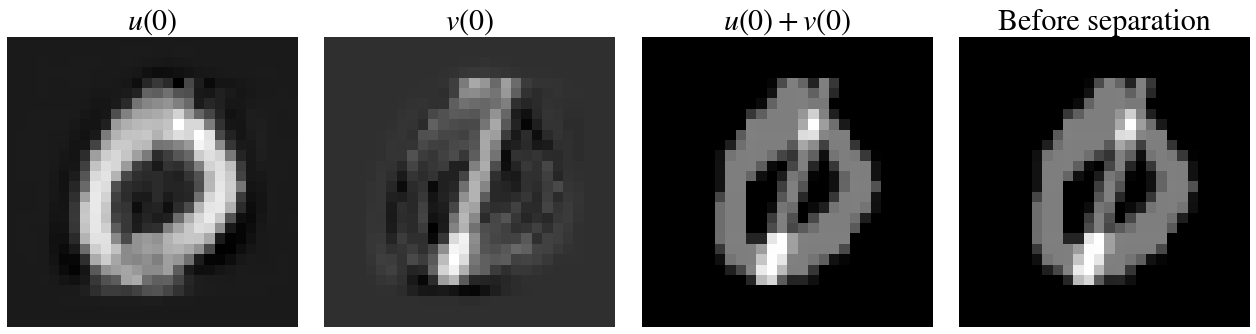

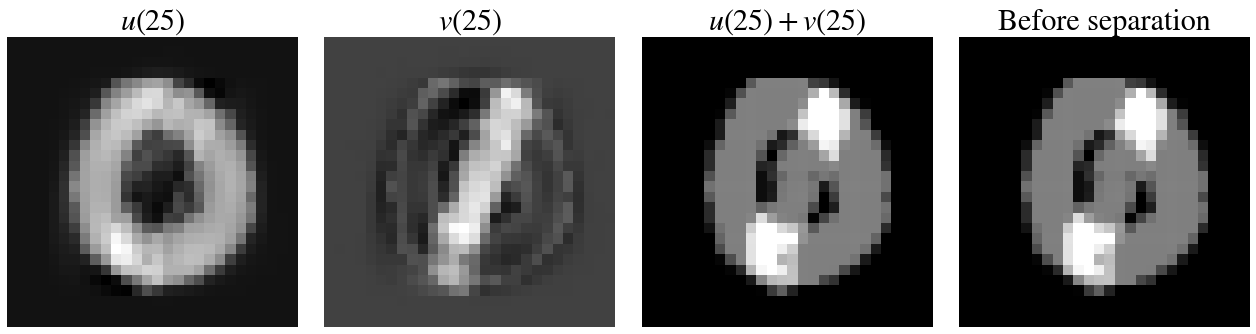

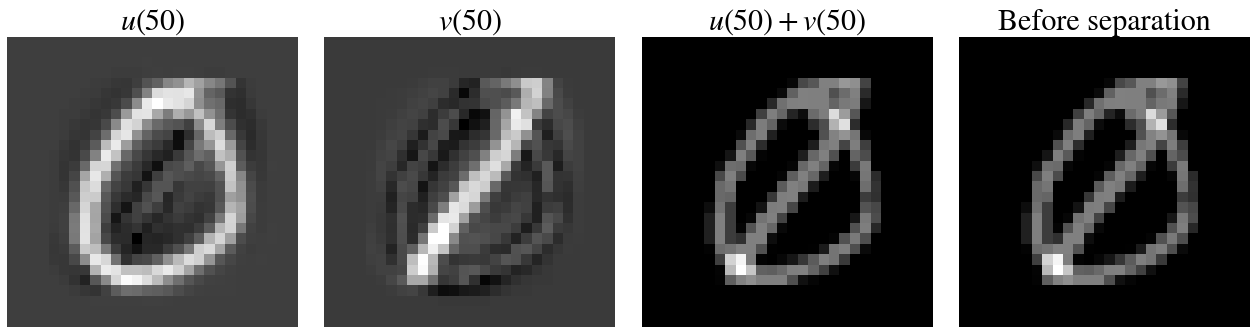

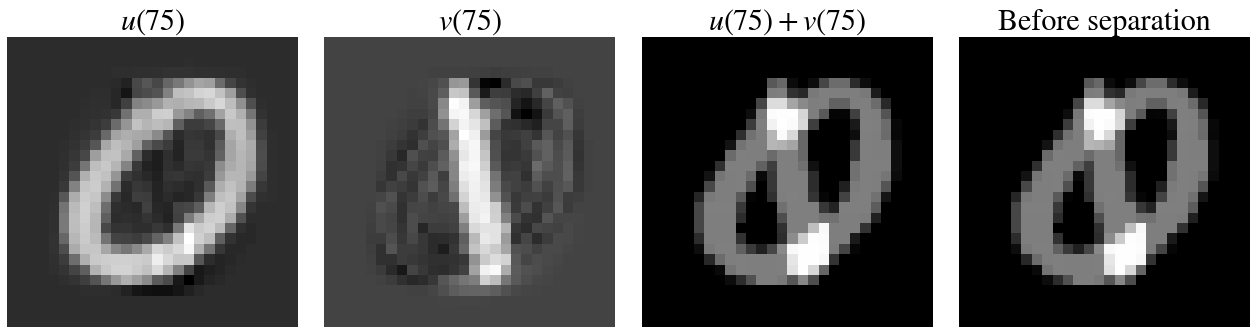

In [49]:
# Calculating and plotting u and v
n_plot = [0, 25, 50, 75]
for n_i in n_plot:
    u_temp, v_temp = calculate_minimal_norm(W0, W1, Mixes[:,n_i])
    plot_u_v(u_temp, v_temp, Mixes[:,n_i], n_i)

Can see that the approach for the channel source seperation works fairly well. It is clear that the image have been seperated into to distinct parts, one with a circle and one with a straight line. The reconstruction does also look almost pretty much identical to the original.

One disadvantage is that in the seperated images, one can still see a vague outline of the other image. This outline of the other shape is especially visible for the straight line, and it means that the shapes have not been seperated perfectly. 

Also worth noting that the reason the background for the plot of $\bold{u}$ and $\bold{v}$ is grey is somewhat because of an error due to the accuracy of the computer. Most cells (that really is supposed to be zero) has a value in the realm of between $10^{-14}$ and $10^{-17}$, these extremely low numbers causes them to be plotted as grey instead of black.

**Improving the minimal norm method (only optional to read, was not asked for in the task)**

One way of potentially solving this problem (while still using the same approach), would be to set a threshold for how large a value has to be in order to be shown (and set all the values beneath this threshold to zero). This will at least solve the problem of the grey background. The following code tests this in order to check if such a quick-fix actually works.

In [50]:
def filter_from_treshold(u, v, thresh):
    '''
    Input:
        u: array
        v: array
        tresh: float
    Output:
        u: array
        v: array
    '''
    # Filtering out all of the values below the treshold
    below_treshold = u < thresh
    u[below_treshold] = 0
    below_treshold = v < thresh
    v[below_treshold] = 0
    return u, v

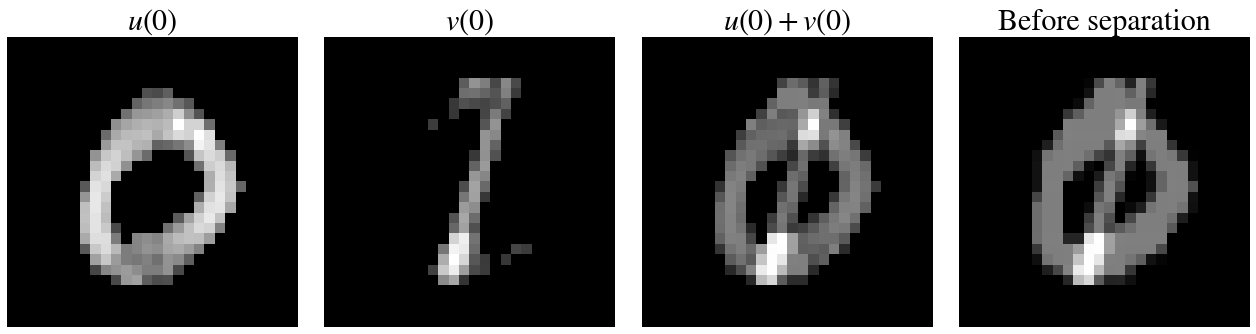

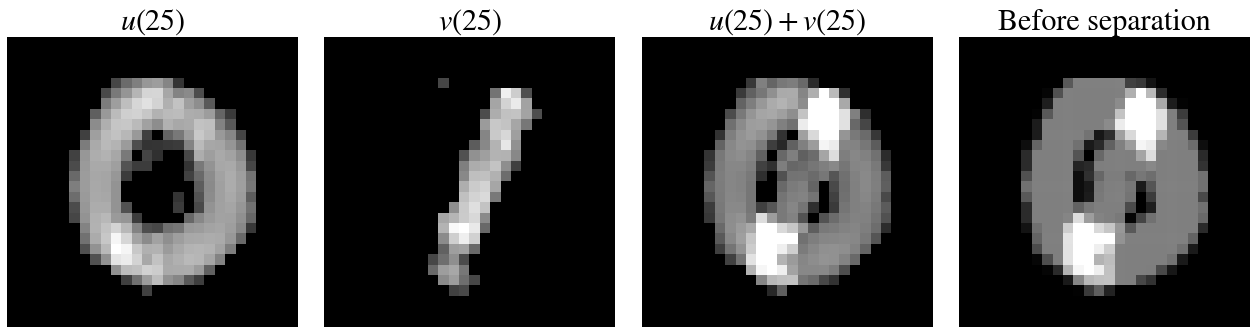

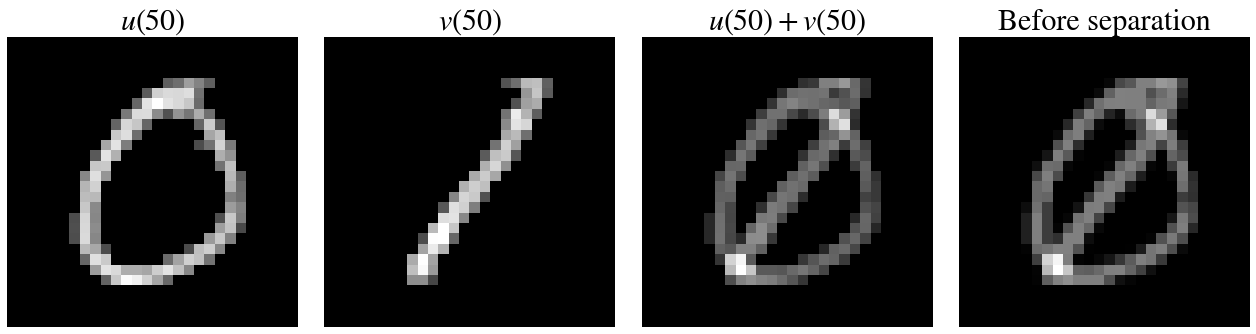

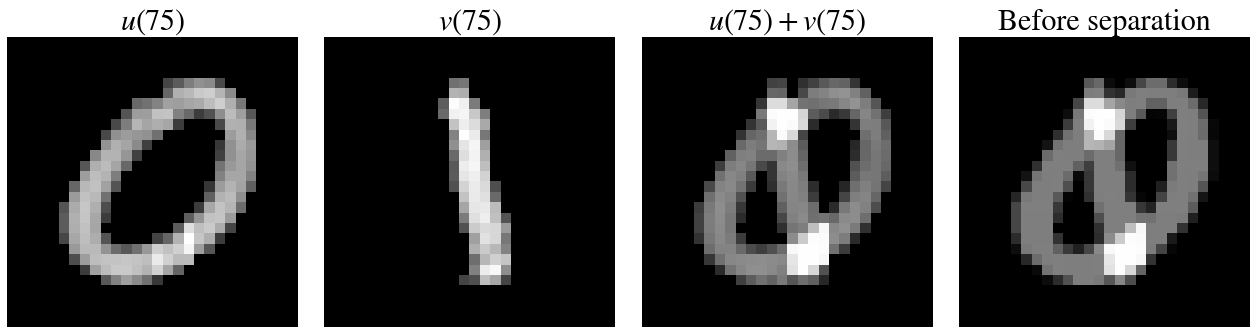

In [51]:
# Choosing a value for the threshold
# Have to use trial and error to find a good value  
threshold = 0.3

n_plot = [0, 25, 50, 75]
for n_i in n_plot:
    u_temp, v_temp = calculate_minimal_norm(W0, W1, Mixes[:,n_i])
    u_temp, v_temp = filter_from_treshold(u_temp, v_temp, threshold)
    
    # Plotting
    plot_u_v(u_temp, v_temp, Mixes[:,n_i], n_i)

Can see that this actually made a difference! Even though the separations are still not perfect, the two separated shapes are a lot more clear than earlier and the outline of the other shape has dissappered. Still, this is not neccecarily a very good "long term" solution. This is because the threshold-level has to be chosen fairly randomly, and might accidentaly erase some parts of the images that was not intended to be removed. Also, can see visually that the reconstructed images differ more from the original image than before the filtering.

Lets instead examine how well the other approach separates the images.

**Tikhonov regularisation**

For the Tikhonov regularisation approach, it is more relevant to check the separations for different $\mu$-values. Use the generate_mu-funtion to generate different $\mu$-values, and then separate and plot the same image with regards to these different values. For sake of simplicity, the first image in the mixed-dataset was chosen as the image that will be worked with.

mu = 10000000000.0


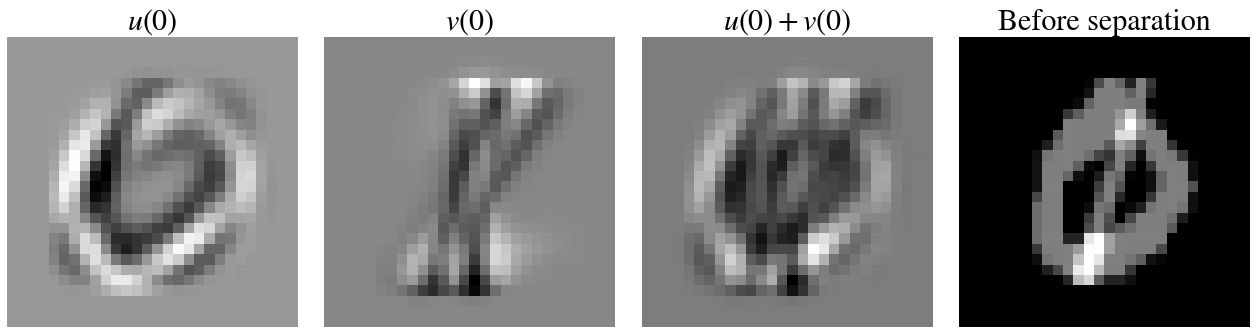

mu = 6309573.444802


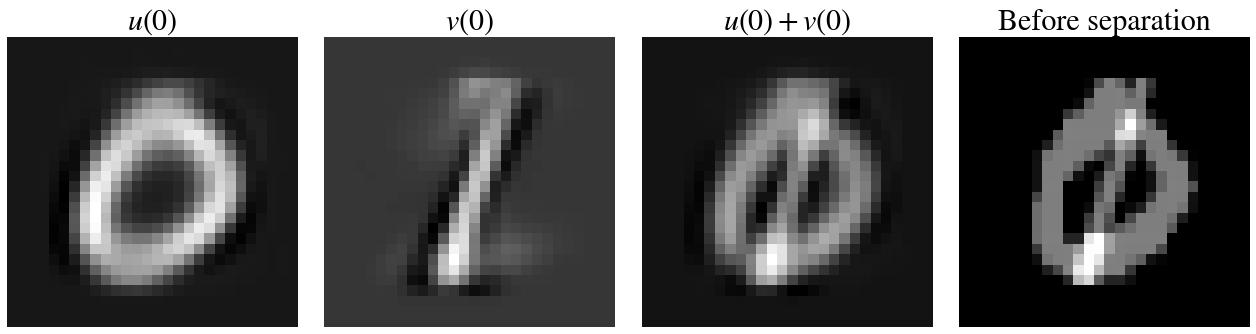

mu = 3981.071706


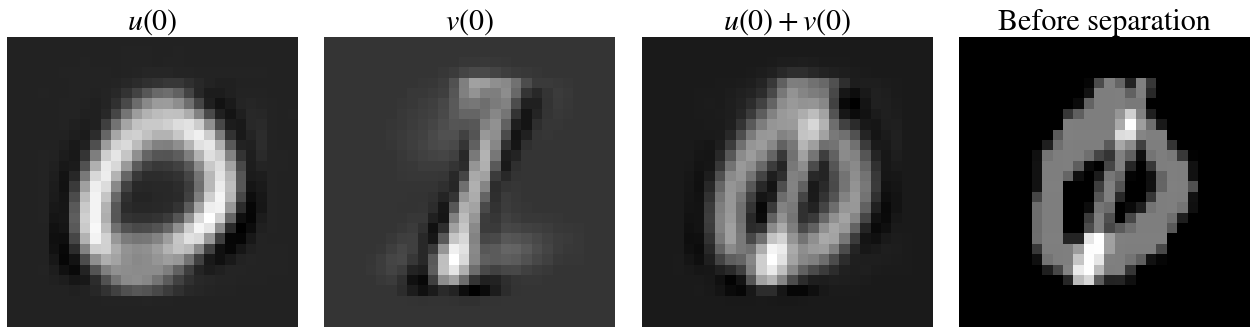

mu = 2.511886


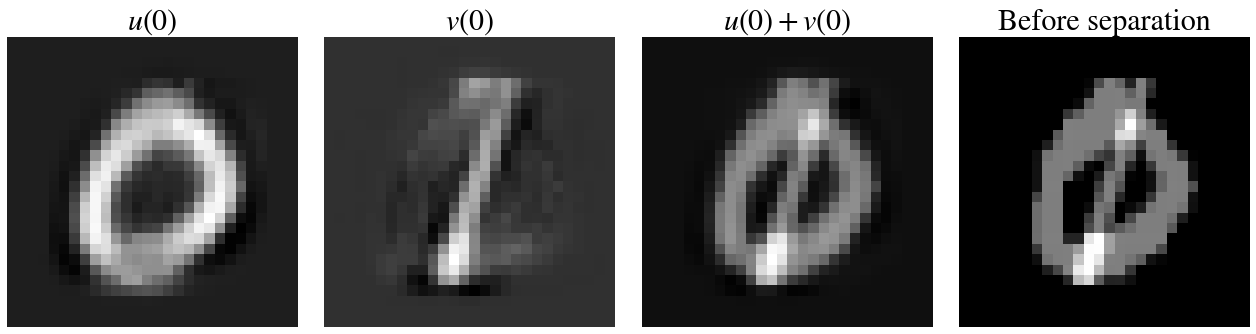

mu = 0.001585


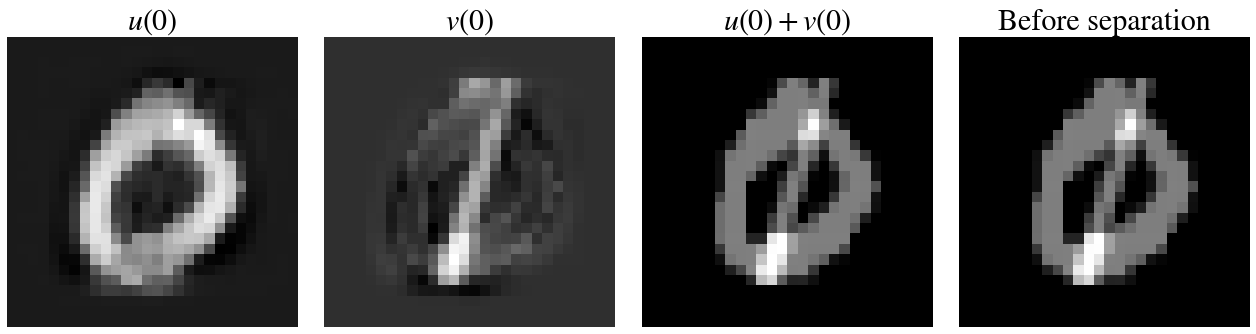

mu = 1e-06


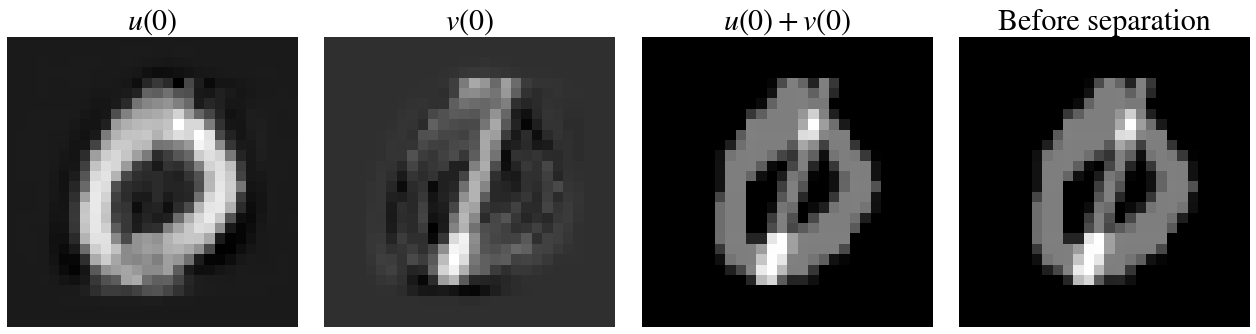

In [52]:
mu = generate_mu(6, -6, 10) # Generate an array of mu-values, chose values between 10^(-6) and 10^(10) 

# Calculating and plotting u and v for the different mu-values
for mu_i in mu:
    u_temp, v_temp = calculate_tikhonov_regulation(W0, W1, Mixes[:,0], mu_i)
    plot_u_v(u_temp, v_temp, Mixes[:,0], 0, mu_i)

Very interesting to see how the size of $\mu$ affects the separations. For higher $\mu$-values the separations are more blurry and undefined. In the $\mu = 10^{10}$ case, the separations were so unclear that the reconstrution looked almost nothing like the original. On the other hand, for lower values, the saparations are more distinct and pixelated, but also have a clear outline of the other shape (which is supposed to be separated away). 

Different values for $\mu$ will probably have different usecases, and by only testing on this particular dataset, it is hard to say which resulted in the best separation (not taking the reconstruction into account). Purely visually, lower $\mu$-values yielded a reconstruction that looked more like the original image. Yet, I think the bit blurrier images (but not as blurry as for f.ex $\mu = 10^{10}$) conveyed the two shapes better than the sharper in the separations.

Also notice that as $\mu$ decreases, the separations look more and more similar to that of the minimal norm approach. This is - as mentioned earlier - because the two approaches ends up with the same linear systems when $\mu = 0$.

**Measuring the reconstructions**

It can be insightful to plot the norms between the original image and the reconstructed image (after separation), and see how the $\mu$-values affect the error. The following code plots the errors as a function of $\mu$ for some randomly chosen images.

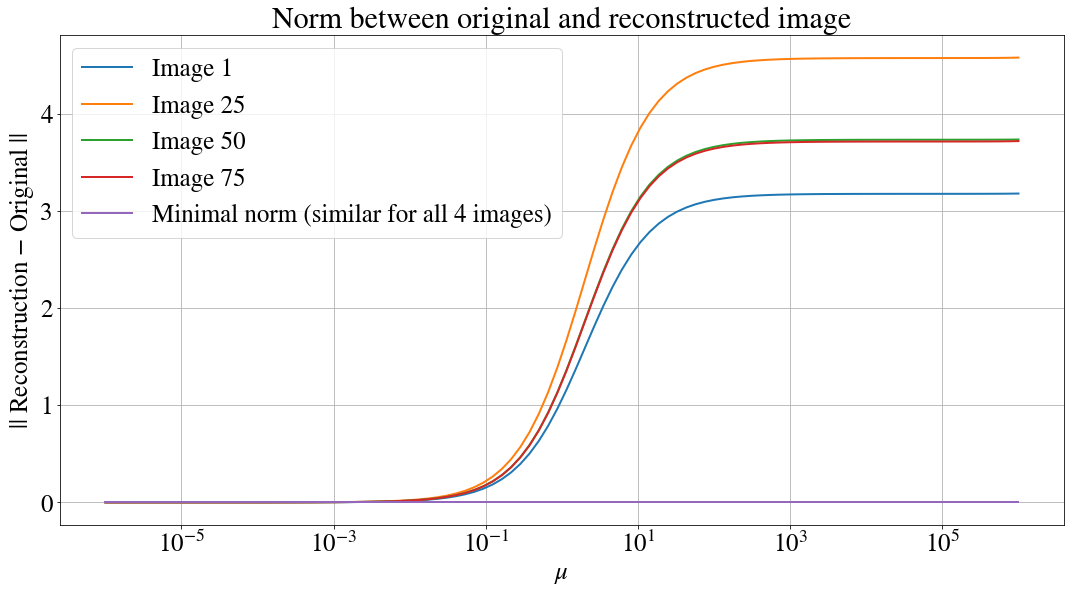

In [53]:
mu = generate_mu(100) # Generate an array of 100 mu-values
norms_img_1 = []
norms_img_25 = []
norms_img_50 = []
norms_img_75 = []

# Calculating and plotting u and v for the different mu-values
for mu_i in mu:
    starttime = time.time()

    # Image 1
    u_temp, v_temp = calculate_tikhonov_regulation(W0, W1, Mixes[:,0], mu_i)
    norms_img_1.append(np.linalg.norm((u_temp + v_temp) - Mixes[:,0]))
    # Image 25
    u_temp, v_temp = calculate_tikhonov_regulation(W0, W1, Mixes[:,25], mu_i)
    norms_img_25.append(np.linalg.norm((u_temp + v_temp) - Mixes[:,25]))
    # Image 50
    u_temp, v_temp = calculate_tikhonov_regulation(W0, W1, Mixes[:,50], mu_i)
    norms_img_50.append(np.linalg.norm((u_temp + v_temp) - Mixes[:,50]))
    # Image 75
    u_temp, v_temp = calculate_tikhonov_regulation(W0, W1, Mixes[:,75], mu_i)
    norms_img_75.append(np.linalg.norm((u_temp + v_temp) - Mixes[:,75]))

u_temp, v_temp = calculate_minimal_norm(W0, W1, Mixes[:,0])
norms_minimal_norm = np.ones(len(mu)) * np.linalg.norm((u_temp + v_temp) - Mixes[:,0])

plt.plot(mu, norms_img_1, label="Image 1")
plt.plot(mu, norms_img_25, label="Image 25")
plt.plot(mu, norms_img_50, label="Image 50")
plt.plot(mu, norms_img_75, label="Image 75")
plt.plot(mu, norms_minimal_norm, label="Minimal norm (similar for all 4 images)")
plt.title("Norm between original and reconstructed image")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$||$ Reconstruction $-$ Original $||$')
plt.xscale("log") # Scale the x-axis logarithmically
plt.grid()
plt.legend()
plt.show()

Can see that in general, the reconstructions using lower $\mu$-values are closer to the original image. This is maybe not so suprising considering the blurryness of the separations when using high $\mu$-values. For the minimal norm-method (as the name suggest), the difference between the original image and the reconstruction is very low. As discussed earlier, for small $\mu$-values, the methods are very similar, and this is also easy to see from the plot. 

Worth noting that this graph does not neccecarily tell ut that it is always best to use as low $\mu$-values as possible, only that these values are the ones that gets the reconstruction closest to the original. This is because the best $\mu$-value also depends on what the usecase of the saparation is.

## **Conslusion**

Throughout this project , we have explored different ways of solving undetermined linear systems. By using some clever math it is possible to find methods of solving such systems that are flexible and (relatively) fast. It is also worth remembering that different methods have their own strengths and weaknesses. For example, the QR-method (using the minimal norm) yields in general a solution $\bold{x}_{min}$ that lies closer to the true solution $\bold{x}_{true}$ than the SVD-method (using the Tikhonov regularisation) does (this of couse if somewhat dependant on the value of $\mu$). The QR-method is also a lot faster, which is a big advantage. On the other hand, due to the $\mu$-parameter, the SVD-method is more flexible. 


Although our methods are relatively easy to program and implement, we have also seen that the functions from the _Numpy_-library are for most intents and purposes very quick, accurate and simple to integrate. For example, we could program a function to perform a QR-decomposition ourselves, but the _np.linalg.qr_-function will probably be faster and (almost) guaranteed bug-free. It is maybe not surprising that these Numpy-functions are so commonly used. Yet, this does of course not mean that we should use _Numpy_-functions for everything, as these also have their limitations. F.ex - as we have seen - solving many (similar) linear systems in a for loop with the _np.linalg.solve_-function might not be the most efficient way to go. In addition, it is important to understand the math and algorithms behind how they work. That beeing said, the _Numpy_-library is a very handy tool for a lot of applications.

Through the Single Channel Source Separation, we saw how similar methods to the ones that had been developed in Task 1 and 2 could be used to separate images into two channels. Image/Channel separation might sound like dauting and very advanced task, so it is very interesting to see how also this boils down to math that we already know quite well. It was also interesting to see how the $\mu$-value affected how the image was separated (in the Tikhonov regularisation-approach). Even though lower $\mu$-values got the reconstruction closer to the original image, higher $\mu$-values could also be used to bring fourth some qualities in the separated images that we might not have noticed for a lower $\mu$-value.

Overall, this project has given an helpful insight into how one can use quite theoretical mathematical concepts in real world applications (such as solving undetermined systems or separating images). In addition, the first-hand experience of how different fields like computer science and mathematics can be combined will most likely be very relevant for further studies.